# EDA: le taux de désabonnement des banques

## Cadrage du probléme

*Définition : Qu'est-ce que l'attrition ?*
- Pour les besoins de ce tutoriel, nous parlerons simplement d'attrition lorsqu'un **client annule un contrat de service avec la banque**.

*Pourquoi l'attrition est-elle si importante ?*
- Ce n'est qu'en comprenant l'objectif final que vous pourrez construire un modèle utile.
- Il s'agit d'identifier les clients qui risquent de se désabonner.

### Description de jeu de données (Meta-données)

- CLIENTNUM : (Caractéristique, float, continu) - Identifiant unique pour chaque client
- **Attrition_Flag** : **(Prédicteur (Y), discret, binaire)** - Client Attrité (le client quitte l'entreprise) ou Client Existants (le client reste dans l'entreprise)
- Customer_Age : (Caractéristique, int, continu) - Âge du client
- Gender : (Caractéristique, str, discret) - Sexe du client (par exemple, Homme, Femme)
- Dependent_count : (Caractéristique, int, continu) - Nombre de personnes à charge du client. Autrement dit, combien de personnes dépendent du client pour leur soutien financier. Un nombre plus élevé indique que les dépenses peuvent être élevées.
- Education_Level : (Caractéristique, str, discret) - Niveau d'éducation du client
- Marital_Status : (Caractéristique, str, discret) - Situation matrimoniale du client
- Income_Category : (Caractéristique, str, discret) - Catégorie de revenu annuel du client (par exemple : *[< 40K$], [40K$ - 60K$], [60K$ - 80K$], [80K$ - 120K$], [> 120K$], Inconnu*)
- Card_Category : (Caractéristique, str, discret) - Catégorie de carte détenue par le client (par exemple : *Bleu, Argent, Or, Platine*)
- Credit_Limit : (Caractéristique, float, continu) - Limite de crédit sur la carte de crédit
- Months_on_book : (Caractéristique, int, continu) - Nombre de mois pendant lesquels le client est client de la banque (mois de présence du client à la banque)
- Total_Relationship_Count : (Caractéristique, int, continu) - Nombre total de produits détenus par le client (par exemple : *cartes, comptes, etc*)
- Months_Inactive_12_mon : (Caractéristique, int, continu) - Nombre de mois d'inactivité du client au cours des 12 derniers mois
- Contacts_Count_12_mon : (Caractéristique, int, continu) - Fréquence des contacts avec le client au cours des 12 derniers mois
- Total_Revolving_Bal : (Caractéristique, float, continu) - Solde non remboursé sur la carte de crédit
- Avg_Open_To_Buy : (Caractéristique, float, continu) - Crédit disponible pour ouvrir une nouvelle limite
- Total_Trans_Amt : (Caractéristique, float, continu) - Total des transactions au cours des 12 derniers mois
- Total_Trans_Ct : (Caractéristique, int, continu) - Nombre total de transactions (12 derniers mois)
- Contacts_count_12_mont : (Caractéristique, int, continu) - Nombre de fois où la banque a contacté le client et/ou vice versa au cours des 12 derniers mois. Potentiellement lié aux campagnes publicitaires.
- Total_Amt_Chng_Q4_Q1 : (Caractéristique, float, continu) - Représente l'augmentation des dépenses du client en comparant le 4ème trimestre au 1er trimestre
- Total_Ct_Chng_Q4_Q1 : (Caractéristique, float, continu) - Similaire à la précédente, mais en termes de nombre de transactions
- Avg_Utilization_Ratio : (Caractéristique, float, continu) - Représente la proportion du crédit disponible que le client a dépensée


## Les Attribues :

#### Categorical 

- Attrition_Flag : (1: Client actif, 0: Client résilié) - Indique si le client a résilié ou non
- Gender : (1: Homme, 0: Femme) - Sexe du client
- Education_Level : (Diplômé, Lycée, Inconnu, Non diplômé, Université, Post-Gradué, Doctorat) - Niveau d'éducation
- Marital_Status : (Marié, Célibataire, Inconnu, Divorcé) - Situation matrimoniale du client
- Income_Category : (Moins de 40K, 40K - 60K, 80K - 120K, 60K - 80K, Inconnu, 120K +) en dollars - Catégorie de revenu
- Card_Category : (Bleu, Argent, Or, Platine) - Catégorie de carte de crédit


#### Numerique :

- **Customer_Age** : Âge du client en années
- **Dependent_count** : Nombre de personnes à charge
- **Months_on_book** : Période de relation avec la banque
- **Total_Relationship_Count** : Nombre total de produits détenus par le client
- **Months_Inactive_12_mon** : Nombre de mois d'inactivité au cours des 12 derniers mois
- **Contacts_Count_12_mon** : Nombre de contacts au cours des 12 derniers mois
- **Credit_Limit** : Limite de crédit sur la carte de crédit
- **Total_Revolving_Bal** : Solde total renouvelable de la carte de crédit
- **Avg_Open_To_Buy** : Ligne de crédit ouverte à l'achat (moyenne des 12 derniers mois)
- **Total_Amt_Chng_Q4_Q1** : Variation du montant des transactions (T4 sur T1)
- **Total_Trans_Amt** : Montant total des transactions (12 derniers mois)
- **Total_Trans_Ct** : Nombre total de transactions (12 derniers mois)
- **Total_Ct_Chng_Q4_Q1** : Variation du nombre de transactions (T4 sur T1)
- **Avg_Utilization_Ratio** : Taux moyen d'utilisation des cartes


### Implimentation :

In [3]:
import numpy as np # Algèbre linéaire / Matrices
import pandas as pd # Traitement des données, Entrée/Sortie de fichiers CSV (par exemple pd.read_csv) / Dataframes
import matplotlib.pyplot as plt # Visualisation des données
import seaborn as sns  # Visualisation des données (avancée)
import plotly.express as ex # Visualisation interactive des données
import plotly.graph_objs as go # Objets de graphiques interactifs
from plotly.subplots import make_subplots
import plotly.express as px

In [4]:

# Charger le jeu de données à partir du fichier CSV
data_set = pd.read_csv('datasets/BankChurners.csv')

# Afficher les 7 premières lignes du jeu de données
data_set.head(7)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988


### explore les metadonnées

In [5]:
# Afficher la forme du jeu de données (nombre de lignes, nombre de colonnes)
data_set.shape

(10127, 23)

In [6]:
# Afficher des informations sur le jeu de données, y compris les types de données et les valeurs non nulles
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
data_set.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
# Get unique count for each variable
data_set.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

**Observation :**

- Il n'y a pas de données manquantes et les types d'index sont corrects.
- Nous pouvons conclure que le jeu de données a été nettoyé.

In [9]:
# Supprimer les deux premières colonnes
data_set = data_set[data_set.columns[:-2]]

# Supprimer la première colonne restante
data_set = data_set[data_set.columns[1:]]

# Afficher les deux premières lignes du jeu de données modifié
data_set.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


*Observations :*
- Les deux dernières colonnes fournissent les résultats calculés par un modèle.
- La première colonne contient l'identifiant unique du client et aucune autre information significative dans le système.

In [10]:
# Afficher les statistiques descriptives du jeu de données
data_set.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
# Définir la liste des colonnes catégorielles
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Afficher le décompte des valeurs pour chaque colonne catégorielle
for col in categorical_cols:
    print(f'\nDécompte des valeurs pour {col}:')
    print(data_set[col].value_counts())



Value counts for Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Value counts for Gender:
Gender
F    5358
M    4769
Name: count, dtype: int64

Value counts for Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Value counts for Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Value counts for Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Value counts for Card_Category:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [12]:
data_set['Attrition_Flag'].describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

### Analyse univarie [X]

- *Frequence / count* pour caractere (X)

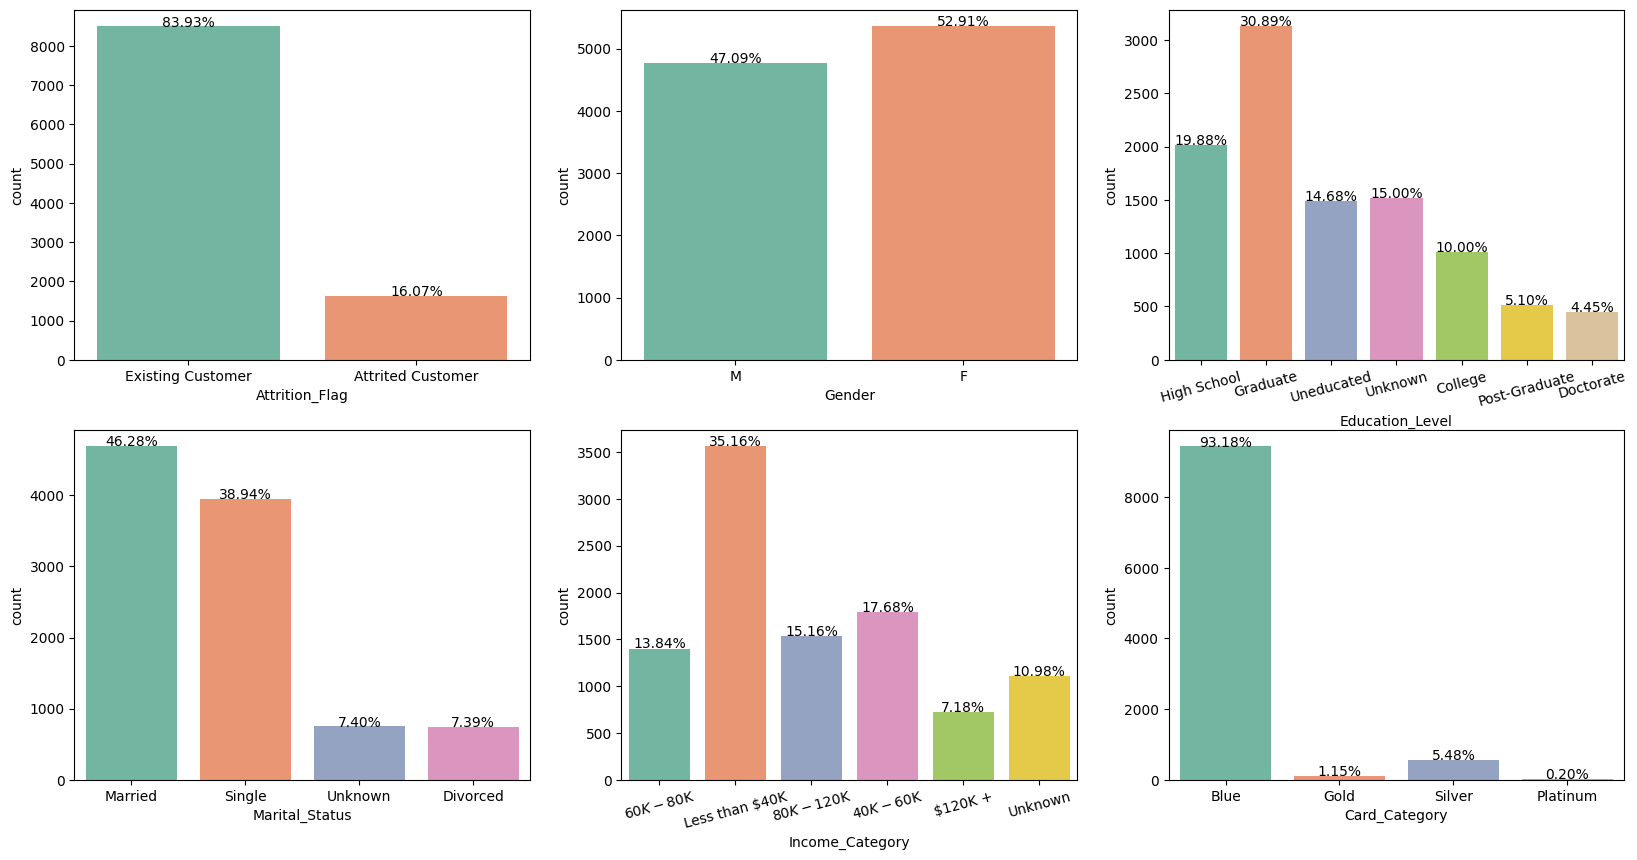

In [13]:
# Liste des colonnes catégorielles à tracer
categoricals = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(data, cats):
    num_cols = 3
    num_rows = (len(cats) + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaire
    fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Ajuster figsize en fonction du nombre de lignes
    index = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if index < len(cats):
                ax = sns.countplot(data=data, x=cats[index], ax=axis[i][j], palette='Set2', hue=cats[index], legend=False)  # Spécifier la palette de couleurs ici
                if cats[index] in ['Education_Level', 'Income_Category']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(15)
                
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(
                            p.get_x()+p.get_width()/2.,
                            height + 3,
                            '{:1.2f}%'.format(height/len(data)*100),
                            ha="center"
                        ) 
                index += 1

# Appeler la fonction pltCountplot avec les données et les colonnes catégorielles
pltCountplot(data_set, categoricals)


*Remarque :*
- La majorité des clients sont classés comme étant des "clients existants", représentant 83,93% du total, soit 8 499 clients.
- En ce qui concerne les caractéristiques démographiques des clients :
    - La plupart ont obtenu leur diplôme ou ont terminé le lycée.
    - La plupart sont mariés ou célibataires.
    - La plupart ont un revenu inférieur à 40k ou compris entre 40k et 60k.
    - La plupart possèdent une carte bleue.


### Analyse bivaraie [X,Y]

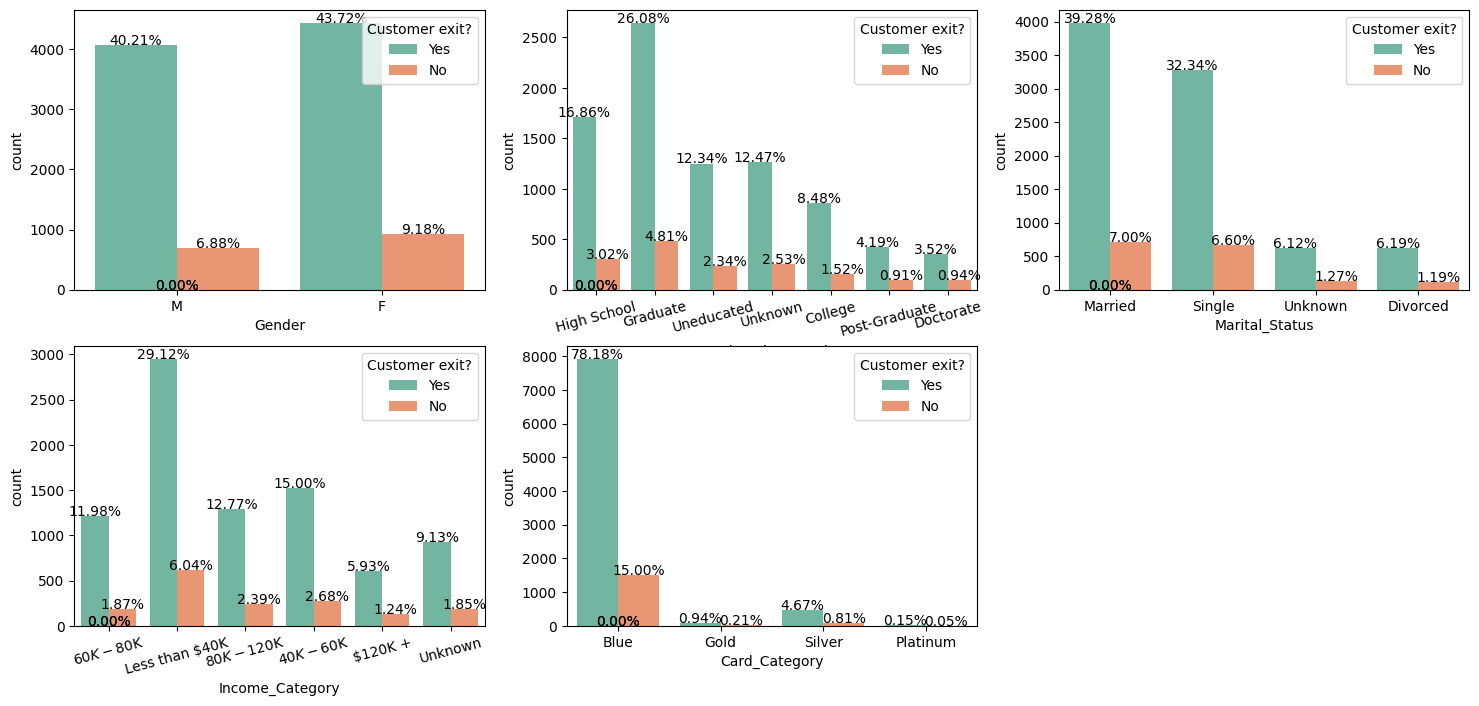

In [14]:
def pltCountplotHueTarget(cats, target, ncols=3):
    """
    Tracer des diagrammes de comptage pour chaque colonne catégorielle avec une nuance basée sur la cible.

    Args:
        cats (list): Liste des noms de colonnes catégorielles à tracer.
        target (str): Nom de la colonne cible pour la nuance.
        ncols (int, optional): Nombre de colonnes dans la disposition de la figure. Défaut est 3.

    """
    # Calculer le nombre de lignes nécessaire pour la disposition de la figure
    nrows = (len(cats) + ncols - 1) // ncols
    # Créer la figure et les axes
    fig, axis = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))  
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            if index < len(cats):
                # Tracer le diagramme de comptage avec une nuance basée sur la colonne cible
                ax = sns.countplot(x=cats[index], data=data_set, hue=target, ax=axis[i][j], palette='Set2')
                # Ajouter la légende
                ax.legend(
                    title='Customer exit?',
                    loc='upper right',
                    labels=['Yes', 'No']
                )
                # Rotation des étiquettes sur l'axe x pour certaines colonnes
                if cats[index] in ['Education_Level', 'Income_Category']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(15)
                # Ajouter les pourcentages au-dessus de chaque barre
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        height + 3,
                        '{:1.2f}%'.format(height / len(data_set) * 100),
                        ha="center"
                    )
                index += 1
            else:
                axis[i][j].axis('off')

# Appeler la fonction pltCountplotHueTarget avec les colonnes catégorielles et la colonne cible
pltCountplotHueTarget(categoricals[1:], 'Attrition_Flag', ncols=3)


*Remarque :*
- La répartition des genres est similaire entre les clients ayant résilié et ceux n'ayant pas résilié, indiquant que le genre seul pourrait ne pas être un facteur distinctif dans la résiliation.

*Questiones :*
- Quelle est la différence entre le taux d'attrition des hommes et celui des femmes ?
- Le niveau d'éducation influence-t-il le taux de désabonnement ?
- La situation famillier des clients influence-t-elle le taux de désabonnement ?
- Est-ce que la catégorie de revenu influence le taux d'attrition ?
- Est-ce qu'il y a une relation entre la catég  orie de carte et (la situation matrimoniale, la catégorie de revenu) ?

### Gender 

In [15]:
# attrtion client base on gender
M_client = data_set.loc[(data_set['Gender'] == 'M') & (data_set['Attrition_Flag'] == 'Attrited Customer')]
F_client = data_set.loc[(data_set['Gender'] == 'F') & (data_set['Attrition_Flag'] == 'Attrited Customer')]

# calculate the mean of the attributes 
a =(M_client.describe()).loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
b = (F_client.describe()).loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
index = {'Males': a, 'Females': b}
comparaison = pd.DataFrame(index)
pd.options.display.float_format = '{:,.2f}'.format
comparaison

,Males,Females
Customer_Age,46.71,46.62
Months_on_book,36.21,36.15
Total_Relationship_Count,3.12,3.40
Months_Inactive_12_mon,2.70,2.69
Contacts_Count_12_mon,3.02,2.94
Credit_Limit,"12,966.89","4,515.50"
Avg_Open_To_Buy,"12,286.58","3,848.29"
Total_Revolving_Bal,680.32,667.21
Total_Trans_Amt,"3,509.78","2,784.18"
Avg_Utilization_Ratio,0.11,0.20


In [16]:
# Calculate the dispersion (standard deviation) of the attributes
a = (M_client.describe()).loc['std', ['Credit_Limit','Avg_Open_To_Buy']]
b = (F_client.describe()).loc['std',['Credit_Limit','Avg_Open_To_Buy']]
index = {'Males': a, 'Females': b}
comparaison = pd.DataFrame(index)
pd.options.display.float_format = '{:,.2f}'.format
comparaison

,Males,Females
Credit_Limit,"10,890.98","5,029.45"
Avg_Open_To_Buy,"10,916.48","5,041.40"


*Remarques :*
- En termes de nombre, les femmes sont plus nombreuses que les hommes de *5,82%* et les churn de *2,3%*.
- la plupart des valeurs entre les deux sexes semblent être similaires 
- les hommes font plus de transactions que les femmes 
- Même les valeurs des attributs `Avg_Open_To_Buy` et `Credit_Limit` sont différentes.

*Question :*
- Cette disparité a-t-elle un rapport avec le revenu ? 

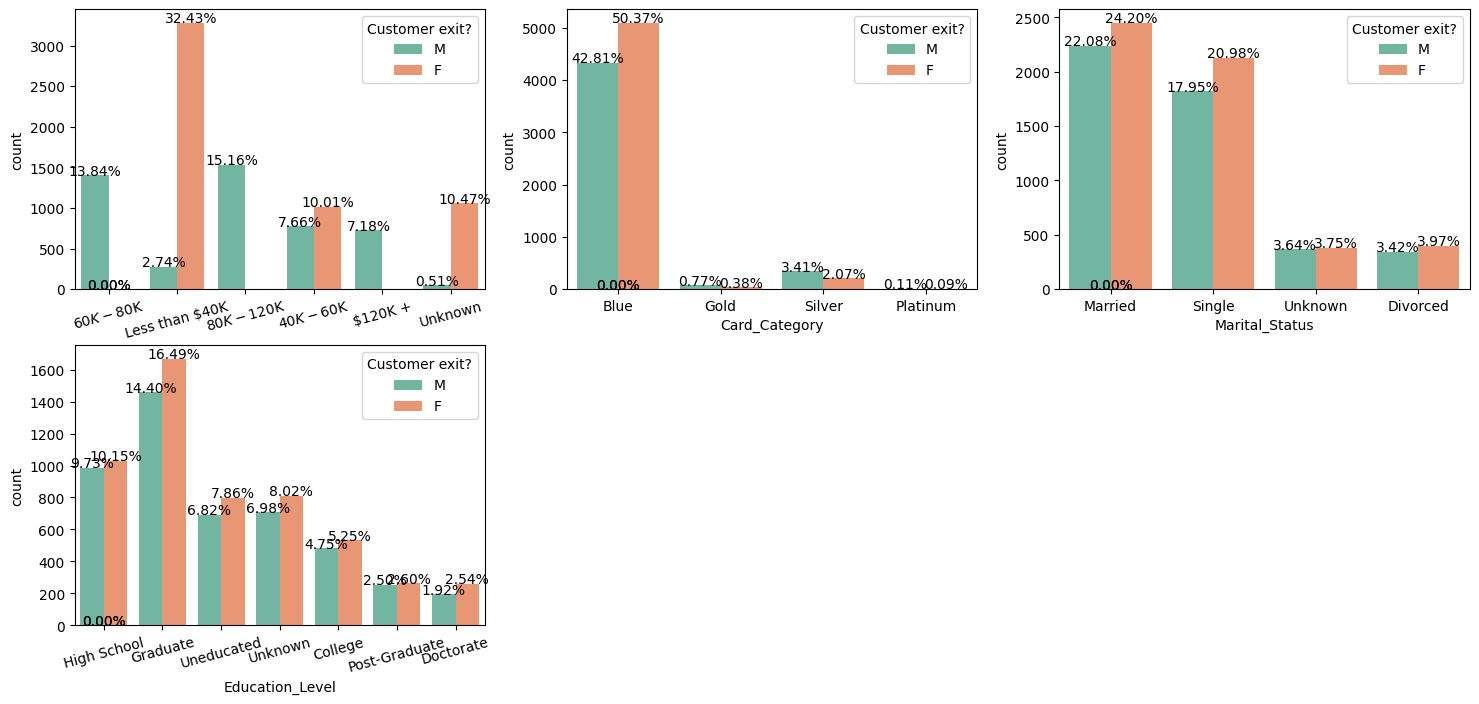

In [17]:
def pltCountplotHueTarget(cats, target, ncols=3):
    nrows = (len(cats) + ncols - 1) // ncols
    fig, axis = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))  
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            if index < len(cats):
                ax = sns.countplot(x=cats[index], data=data_set, hue=target, ax=axis[i][j], palette='Set2')
                ax.legend(
                    title='Customer exit?',
                    loc='upper right',
                    labels=['M', 'F']
                )
                if cats[index] in ['Education_Level', 'Income_Category']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(15)

                for p in ax.patches:
                    height = p.get_height()
                    ax.text(
                        p.get_x() + p.get_width() / 2.,
                        height + 3,
                        '{:1.2f}%'.format(height / len(data_set) * 100),
                        ha="center"
                    )
                index += 1
            else:
                axis[i][j].axis('off')

categorical = ['Income_Category', 'Card_Category', 'Marital_Status', 'Education_Level']
pltCountplotHueTarget(categorical, 'Gender', ncols=3)

*Remarque :*
- Nous constatons que la dispersion dans les deux attributs `Avg_Open_To_Buy` , `Credit_Limit` , `TranTotal_Trans_Amt` est liée à la catégorie de revenu. La plupart des femmes gagnent moins que les hommes.

*Conclusion :*
- Sur la base de toutes les observations précédentes concernant le genre, nous pouvons conclure que **le sexe n'aura pas d'effet sur la prédiction par contre catégorie de revenus**

### Education level

In [18]:
# List of unique education levels
education_levels = ['Graduate', 'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']

# Dictionary to store means for each education level
means = {}
frame = {}
# Calculate means for each education level
for level in education_levels:
    filtered_data = data_set[(data_set['Education_Level'] == level) & (data_set['Attrition_Flag'] == 'Attrited Customer')]
    means[level] = filtered_data.describe().loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
    frame[level] = means[level]
    

# Create DataFrame from dictionary
comparison = pd.DataFrame(frame)

# Set display format for float values
pd.options.display.float_format = '{:,.2f}'.format

# Display the DataFrame
comparison

,Graduate,High School,Unknown,Uneducated,College,Post-Graduate,Doctorate
Customer_Age,46.40,47.45,46.80,46.64,46.08,45.55,47.14
Months_on_book,35.99,37.17,35.62,36.17,36.46,35.79,35.39
Total_Relationship_Count,3.36,3.22,3.19,3.24,3.25,3.35,3.41
Months_Inactive_12_mon,2.69,2.72,2.64,2.76,2.63,2.70,2.71
Contacts_Count_12_mon,3.00,2.87,3.02,3.03,2.96,2.86,3.02
Credit_Limit,"7,968.25","8,896.56","7,713.49","8,334.69","8,412.01","8,449.76","6,438.39"
Avg_Open_To_Buy,"7,312.99","8,251.58","7,050.73","7,635.90","7,732.18","7,690.48","5,718.62"
Total_Revolving_Bal,655.26,644.98,662.76,698.79,679.84,759.28,719.77
Total_Trans_Amt,"3,072.89","3,081.70","3,250.33","3,161.27","2,837.81","3,348.76","2,838.91"
Avg_Utilization_Ratio,0.16,0.14,0.16,0.19,0.17,0.17,0.20


*Remarques :*
- la plupart des valeurs entre les niveaux semblent être similaires
- nous constatons que les clients des collèges et des doctorats effectuent moins de transactions 
- il ya un dispersion en attributs `Avg_Open_To_Buy` et `Credit_Limit` 
- pourquoi ?

In [19]:
sub_data = data_set.loc[data_set['Attrition_Flag'] == 'Attrited Customer']
sub_data = sub_data[['Education_Level', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']]
sub_data['Education_Level'].value_counts()

Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: count, dtype: int64

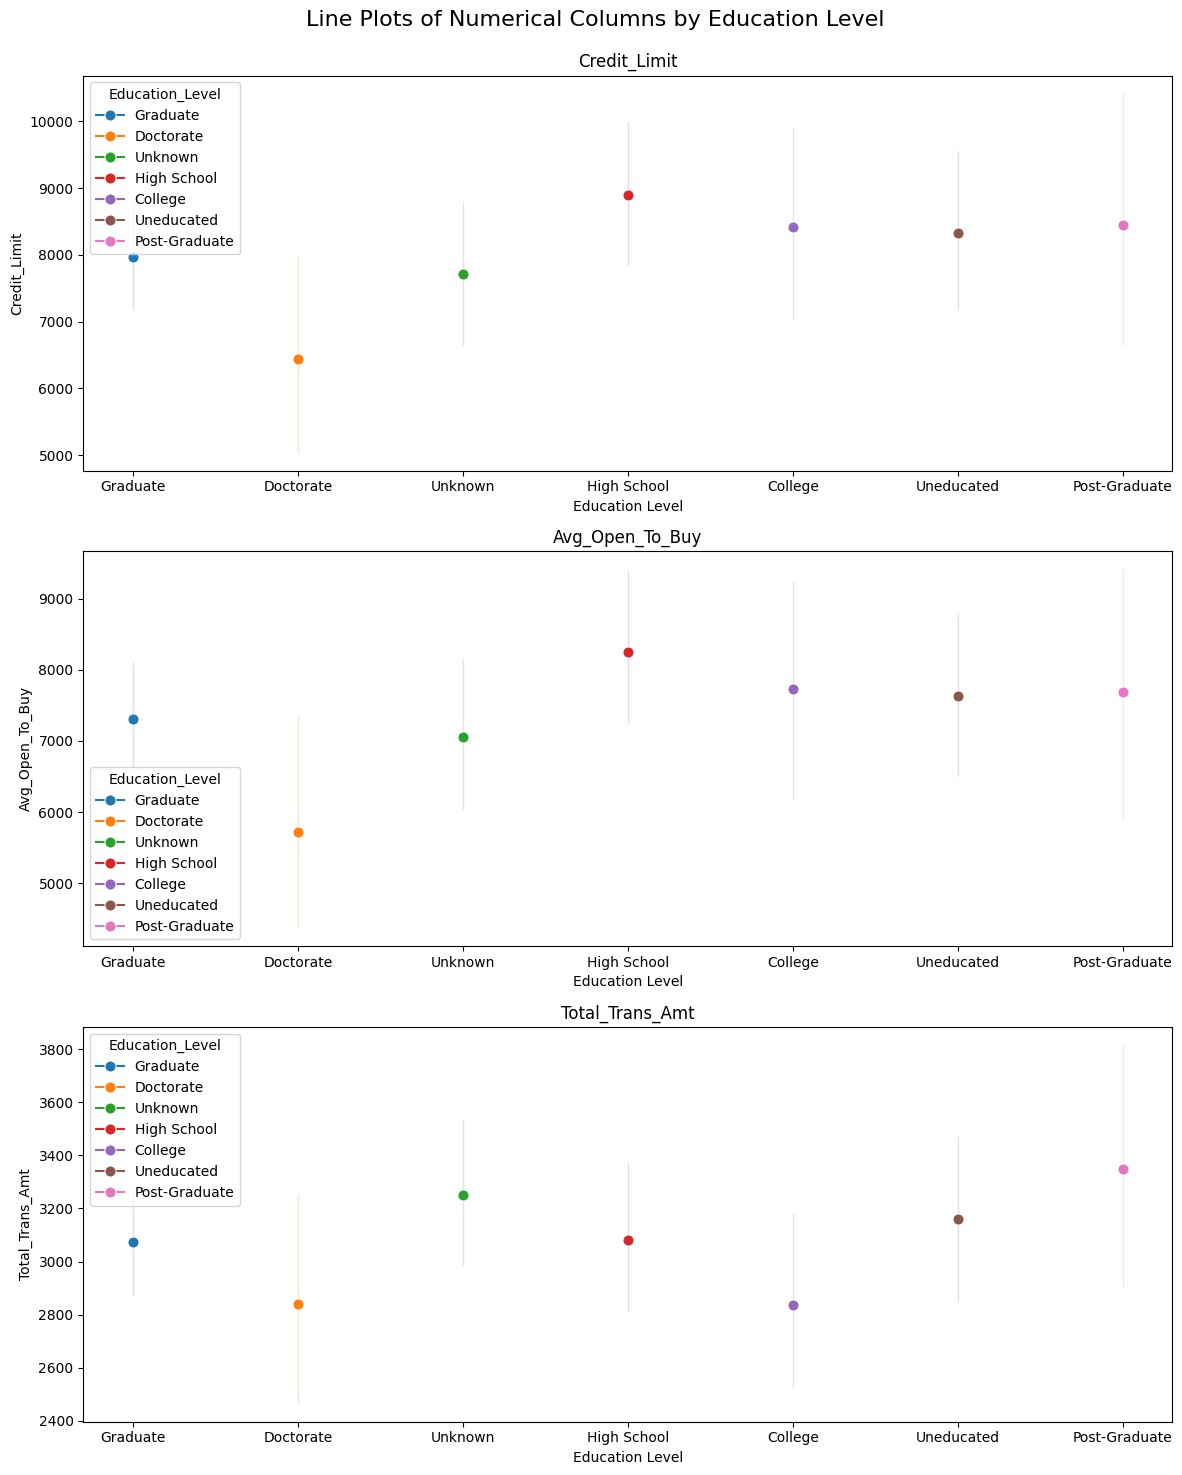

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Set the title for the entire figure
plt.suptitle('Line Plots of Numerical Columns by Education Level\n', horizontalalignment="center", fontstyle="normal", fontsize=16, fontfamily="sans-serif")

# Iterate over each numeric column
for i, col in enumerate(cols):
    # Create a line plot for each numeric column
    sns.lineplot(x='Education_Level', y=col, data=sub_data, ax=ax[i], hue='Education_Level', marker='o', markersize=8)

    # Set the title for each subplot
    ax[i].set_title(col)

    # Set the labels for x-axis and y-axis
    ax[i].set_xlabel('Education Level')
    ax[i].set_ylabel(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
c = sub_data['Education_Level'].count()
comparison_credit = {}
for e in set(sub_data['Education_Level']): 
    filtered_data = sub_data[(sub_data['Education_Level'] == e)]
    comparison_credit[e] = {
        'Per %': (filtered_data['Education_Level'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Credit_Limit'].min(),
        'Max value': filtered_data['Credit_Limit'].max(),
        'Mean value': filtered_data['Credit_Limit'].mean(),
        'Mid value': filtered_data['Credit_Limit'].median()
    }

comparison_df_credit = pd.DataFrame(comparison_credit)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_credit

,Graduate,College,Unknown,Uneducated,High School,Doctorate,Post-Graduate
Per %,[29.932390903503382],[9.465273509526737],[15.734480639213274],[14.566687154271666],[18.80762138905962],[5.838967424708052],[5.654578979717271]
Min value,"1,438.30","1,438.30","1,438.30","1,438.30","1,438.30","1,438.30","1,438.30"
Max value,"34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00"
Mean value,"7,968.25","8,412.01","7,713.49","8,334.69","8,896.56","6,438.39","8,449.76"
Mid value,"4,203.00","4,391.50","3,841.00","3,735.00","4,639.50","3,547.00","4,473.00"


In [22]:
c = sub_data['Education_Level'].count()
comparison_open_to_buy = {}
for e in set(sub_data['Education_Level']): 
    filtered_data = sub_data[(sub_data['Education_Level'] == e)]
    comparison_open_to_buy[e] = {
        'Per %': (filtered_data['Education_Level'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Avg_Open_To_Buy'].min(),
        'Max value': filtered_data['Avg_Open_To_Buy'].max(),
        'Mean value': filtered_data['Avg_Open_To_Buy'].mean(),
        'Mid value': filtered_data['Avg_Open_To_Buy'].median()
    }

comparison_df_open_to_buy = pd.DataFrame(comparison_open_to_buy)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_open_to_buy

,Graduate,College,Unknown,Uneducated,High School,Doctorate,Post-Graduate
Per %,[29.932390903503382],[9.465273509526737],[15.734480639213274],[14.566687154271666],[18.80762138905962],[5.838967424708052],[5.654578979717271]
Min value,58.00,36.00,14.00,3.00,97.00,217.00,14.00
Max value,"34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00"
Mean value,"7,312.99","7,732.18","7,050.73","7,635.90","8,251.58","5,718.62","7,690.48"
Mid value,"3,413.00","3,949.50","2,992.00","3,241.00","4,215.00","2,313.00","3,756.00"


In [23]:
c = sub_data['Education_Level'].count()
comparison_Trans_Amt = {}
for e in set(sub_data['Education_Level']): 
    filtered_data = sub_data[(sub_data['Education_Level'] == e)]
    comparison_Trans_Amt[e] = {
        'Per %': (filtered_data['Education_Level'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Total_Trans_Amt'].min(),
        'Max value': filtered_data['Total_Trans_Amt'].max(),
        'Mean value': filtered_data['Total_Trans_Amt'].mean(),
        'Mid value': filtered_data['Total_Trans_Amt'].median()
    }

comparison_df_Trans_Amt = pd.DataFrame(comparison_open_to_buy)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_Trans_Amt

,Graduate,College,Unknown,Uneducated,High School,Doctorate,Post-Graduate
Per %,[29.932390903503382],[9.465273509526737],[15.734480639213274],[14.566687154271666],[18.80762138905962],[5.838967424708052],[5.654578979717271]
Min value,58.00,36.00,14.00,3.00,97.00,217.00,14.00
Max value,"34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00","34,516.00"
Mean value,"7,312.99","7,732.18","7,050.73","7,635.90","8,251.58","5,718.62","7,690.48"
Mid value,"3,413.00","3,949.50","2,992.00","3,241.00","4,215.00","2,313.00","3,756.00"


*Remarque :*
- nous voyons que la catégorie **High School** a les valeurs les plus élevées et **Doctorat** les plus basses par rapport à toutes les autres & les autres semblent similaires , pourquoi ?

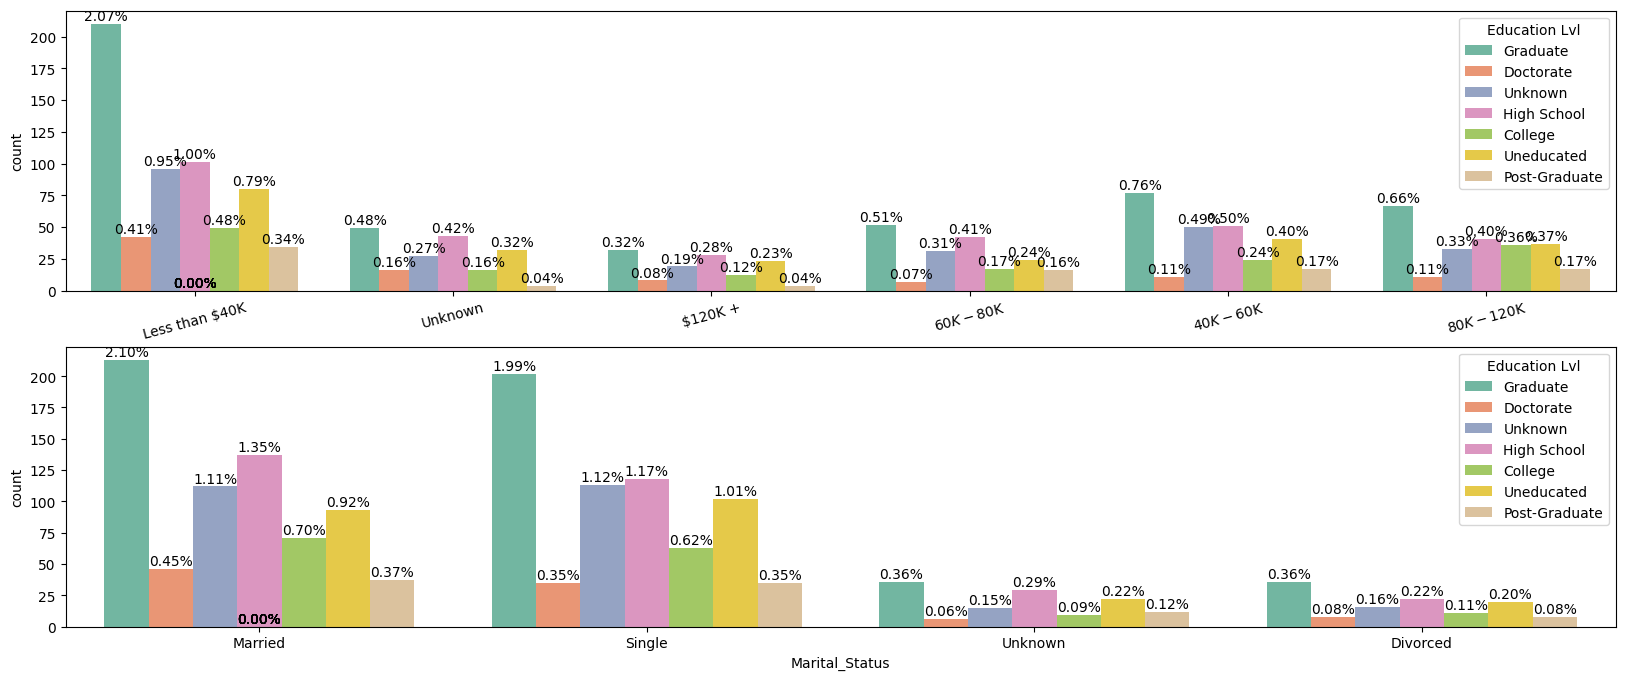

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def pltCountplotHueTarget(cats, target, ncols=1):
    nrows = len(cats)
    fig, axis = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))  
    axis = axis.flatten()  # Flatten the axis array
    index = 0
    for i in range(nrows):
        if index < len(cats):
            ax = sns.countplot(x=cats[index], data=attr_client, hue=target, ax=axis[index], palette='Set2')
            ax.legend(
                title='Education Lvl',
                loc='upper right',
            )
            if cats[index] in ['Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)

            for p in ax.patches:
                height = p.get_height()
                ax.text(
                    p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.2f}%'.format(height / len(data_set) * 100),
                    ha="center"
                )
            index += 1
        else:
            axis[index].axis('off')  # Use axis[index] instead of axis[i][j]

attr_client = data_set.loc[data_set['Attrition_Flag'] == 'Attrited Customer']
categorical = ['Income_Category', 'Marital_Status']
pltCountplotHueTarget(categorical, 'Education_Level', ncols=1)


Remarques :

-Nous avons précédemment noté que les catégories [gradués, universitaires, diplômés de l'enseignement supérieur, non instruits] présentent des similitudes en termes de limite de crédit et d'ouverture moyenne à l'achat.<br>
-Il est remarquable que la catégorie collège/lycée se classe comme la deuxième classe la plus importante dans chaque catégorie de revenu et de statut matrimonial, indiquant ainsi une activité significative parmi ses membres.<br>
-En comparant l'âge actuel des lycéens, nous observons qu'ils prennent davantage de risques et d'engagements.<br>
Il y a plus de doctorants gagnant moins de 40 000 euros, avec une limite de crédit plus basse.<br>
-Nous remarquons que la plupart des doctorants parviennent à équilibrer ou à gérer leurs revenus de manière relativement satisfaisante.
-Nous ne pouvons pas déterminer qui influe sur le taux d'attrition.<br>


### Marital Status

In [25]:
status = set(data_set['Marital_Status'].values)

means = {}
frame = {}
for s in status:
    filtered_data = data_set[(data_set['Marital_Status'] == s) & (data_set['Attrition_Flag'] == 'Attrited Customer')]
    means[s] = filtered_data.describe().loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
    frame[s] = means[s]
    
comparison = pd.DataFrame(frame)
pd.options.display.float_format = '{:,.2f}'.format
comparison

,Unknown,Married,Single,Divorced
Customer_Age,45.99,46.51,47.03,46.15
Months_on_book,35.66,35.96,36.60,35.68
Total_Relationship_Count,3.27,3.33,3.21,3.38
Months_Inactive_12_mon,2.67,2.67,2.70,2.80
Contacts_Count_12_mon,2.82,2.95,3.02,2.98
Credit_Limit,"8,382.18","7,459.99","8,648.98","9,003.19"
Avg_Open_To_Buy,"7,745.06","6,794.91","7,968.02","8,291.80"
Total_Revolving_Bal,637.12,665.08,680.95,711.39
Total_Trans_Amt,"3,200.61","2,910.38","3,271.11","3,092.33"
Avg_Utilization_Ratio,0.16,0.16,0.17,0.14


*Remarques :*
- la plupart des valeurs entre les niveaux semblent être similaires
- nous constatons que les personnes mariées font moins de transactions et que les célibataires en font plus.
- il ya un dispersion en attributs `Avg_Open_To_Buy` et `Credit_Limit` pourquoi ?

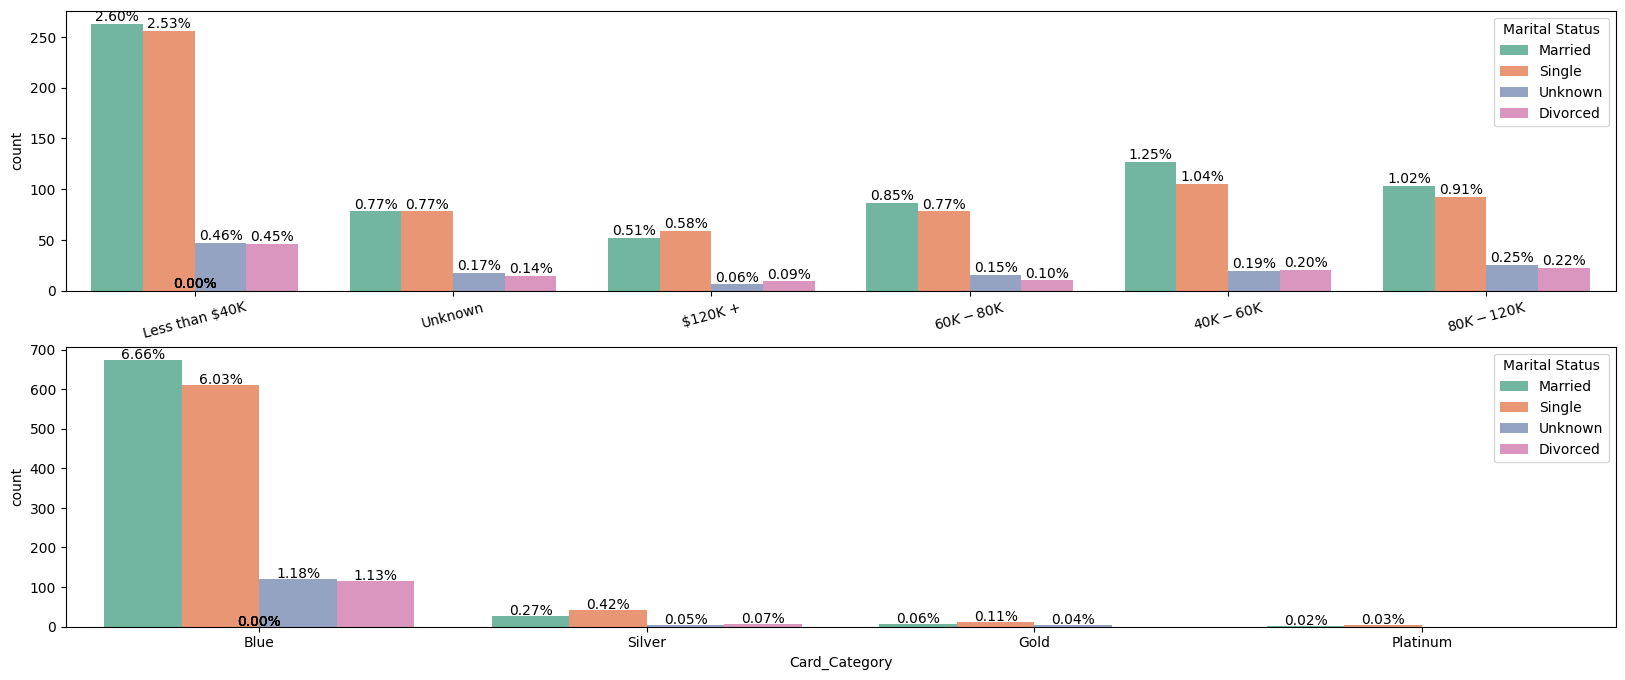

In [26]:
def pltCountplotHueTarget(cats, target, ncols=1):
    nrows = len(cats)
    fig, axis = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))  
    axis = axis.flatten()  # Flatten the axis array
    index = 0
    for i in range(nrows):
        if index < len(cats):
            ax = sns.countplot(x=cats[index], data=attr_client, hue=target, ax=axis[index], palette='Set2')
            ax.legend(
                title='Marital Status',
                loc='upper right',
            )
            if cats[index] in ['Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)

            for p in ax.patches:
                height = p.get_height()
                ax.text(
                    p.get_x() + p.get_width() / 2.,
                    height + 3,
                    '{:1.2f}%'.format(height / len(data_set) * 100),
                    ha="center"
                )
            index += 1
        else:
            axis[index].axis('off')  # Use axis[index] instead of axis[i][j]

attr_client = data_set.loc[data_set['Attrition_Flag'] == 'Attrited Customer']
categorical = ['Income_Category', 'Card_Category']
pltCountplotHueTarget(categorical, 'Marital_Status', ncols=1)

In [27]:
sub_data = data_set.loc[data_set['Attrition_Flag'] == 'Attrited Customer']
sub_data = sub_data[['Marital_Status', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']]
sub_data['Marital_Status'].value_counts()

Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: count, dtype: int64

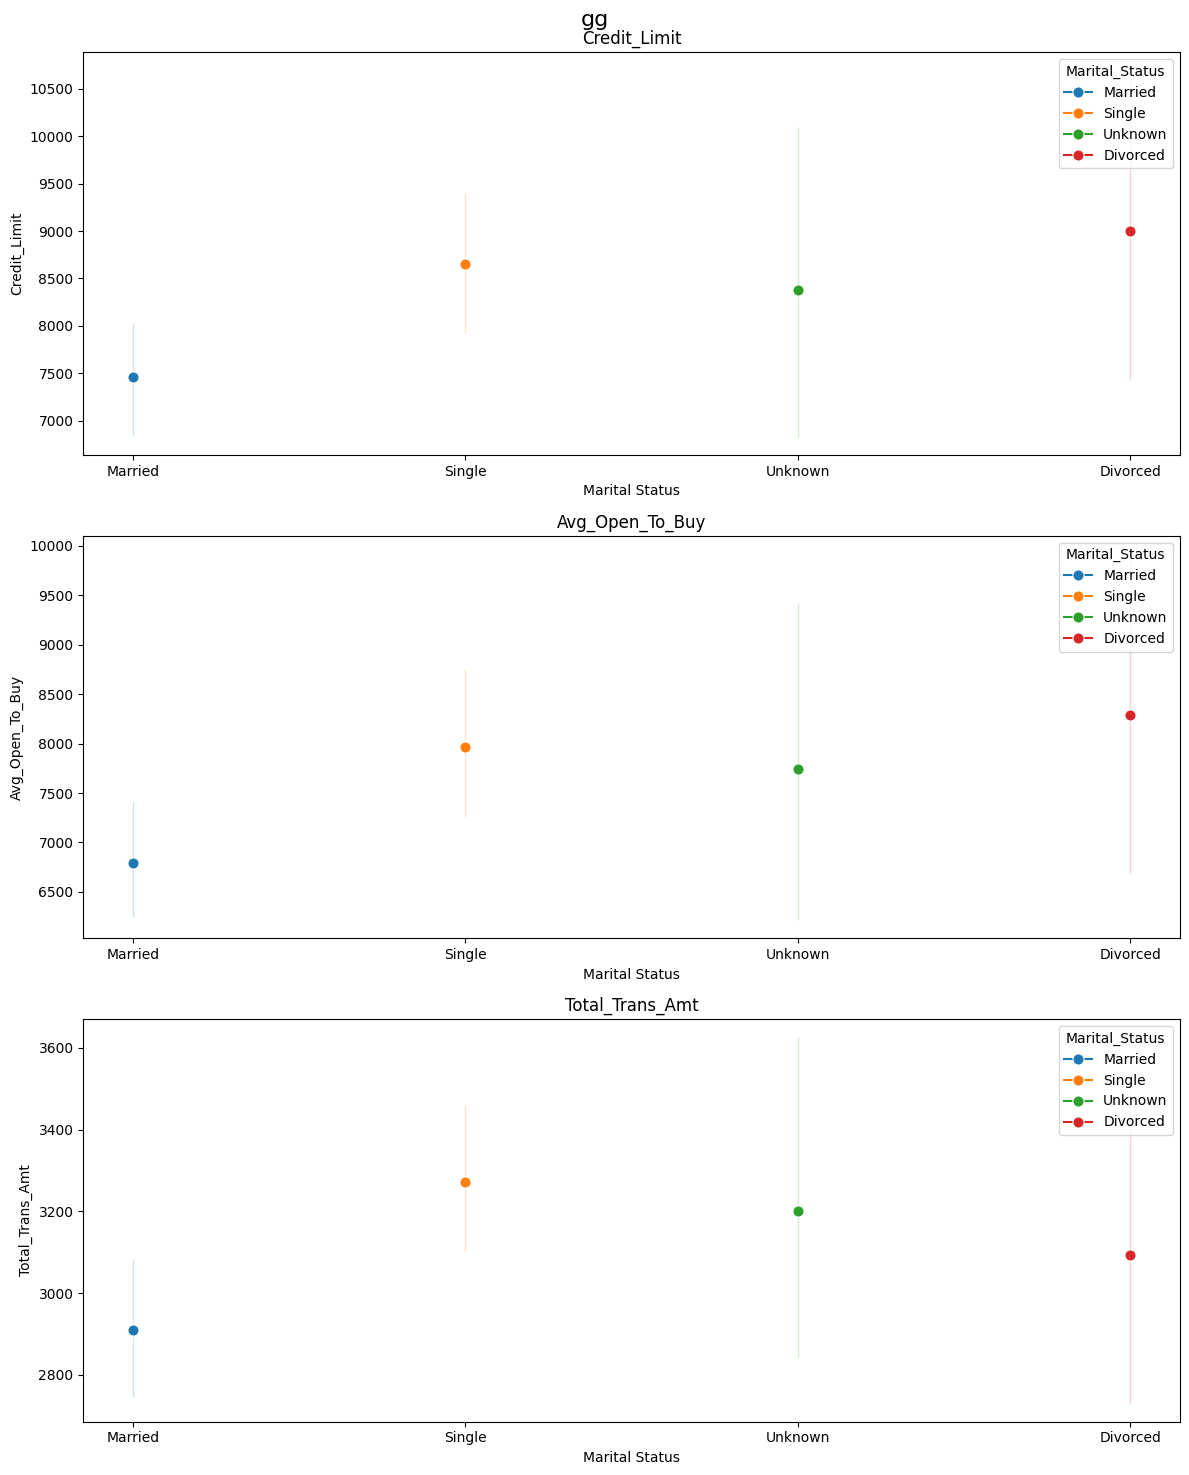

In [28]:
cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Set the title for the entire figure
plt.suptitle('Line Plots of Numerical Columns by Marital Status\n', horizontalalignment="center", fontstyle="normal", fontsize=16, fontfamily="sans-serif")

# Iterate over each numeric column
for i, col in enumerate(cols):
    # Create a line plot for each numeric column
    sns.lineplot(x='Marital_Status', y=col, data=sub_data, ax=ax[i], hue='Marital_Status', marker='o', markersize=8)

    # Set the title for each subplot
    ax[i].set_title(col)

    # Set the labels for x-axis and y-axis
    ax[i].set_xlabel('Marital Status')
    ax[i].set_ylabel(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
c = sub_data['Marital_Status'].count()
comparison_credit = {}
for m  in set(sub_data['Marital_Status']): 
    filtered_data = sub_data[(sub_data['Marital_Status'] == m)]
    comparison_credit[m] = {
        'Per %': (filtered_data['Marital_Status'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Credit_Limit'].min(),
        'Max value': filtered_data['Credit_Limit'].max(),
        'Mean value': filtered_data['Credit_Limit'].mean(),
        'Mid value': filtered_data['Credit_Limit'].median()
    }

comparison_df_credit = pd.DataFrame(comparison_credit)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_credit

,Unknown,Married,Single,Divorced
Per %,[7.928703134603565],[43.57713583282114],[41.057160417947145],[7.43700061462815]
Min value,"1,438.30","1,438.30","1,438.30","1,438.30"
Max value,"34,516.00","34,516.00","34,516.00","34,516.00"
Mean value,"8,382.18","7,459.99","8,648.98","9,003.19"
Mid value,"4,246.00","4,041.00","4,207.50","5,051.00"


In [30]:
c = sub_data['Marital_Status'].count()
comparison_open_to_buy = {}
for m in set(sub_data['Marital_Status']): 
    filtered_data = sub_data[(sub_data['Marital_Status'] == m)]
    comparison_open_to_buy[m] = {
        'Per %': (filtered_data['Marital_Status'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Avg_Open_To_Buy'].min(),
        'Max value': filtered_data['Avg_Open_To_Buy'].max(),
        'Mean value': filtered_data['Avg_Open_To_Buy'].mean(),
        'Mid value': filtered_data['Avg_Open_To_Buy'].median()
    }

comparison_df_open_to_buy = pd.DataFrame(comparison_open_to_buy)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_open_to_buy

,Unknown,Married,Single,Divorced
Per %,[7.928703134603565],[43.57713583282114],[41.057160417947145],[7.43700061462815]
Min value,111.00,14.00,3.00,10.00
Max value,"34,516.00","34,516.00","34,516.00","34,516.00"
Mean value,"7,745.06","6,794.91","7,968.02","8,291.80"
Mid value,"3,654.00","3,387.00","3,509.50","4,733.00"


In [31]:
c = sub_data['Marital_Status'].count()
comparison_Trans_Amt = {}
for m in set(sub_data['Marital_Status']): 
    filtered_data = sub_data[(sub_data['Marital_Status'] == m)]
    comparison_Trans_Amt[m] = {
        'Per %': (filtered_data['Marital_Status'].value_counts().values / c) * 100,         
        'Min value': filtered_data['Total_Trans_Amt'].min(),
        'Max value': filtered_data['Total_Trans_Amt'].max(),
        'Mean value': filtered_data['Total_Trans_Amt'].mean(),
        'Mid value': filtered_data['Total_Trans_Amt'].median()
    }

comparison_df_Trans_Amt = pd.DataFrame(comparison_Trans_Amt)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_Trans_Amt

,Unknown,Married,Single,Divorced
Per %,[7.928703134603565],[43.57713583282114],[41.057160417947145],[7.43700061462815]
Min value,647,510,530,781
Max value,10310,10583,10211,10468
Mean value,"3,200.61","2,910.38","3,271.11","3,092.33"
Mid value,"2,316.00","2,306.00","2,382.00","2,307.00"


*Remarques :*
- Nous constatons que les clients **divorcés** et **célibataires** ont des limites de crédit plus élevées et sont plus ouverts à l'achat que les personnes **mariées**. 
- Cela peut être lié à l'engagement des personnes **mariées**. 
- nous ne pouvons pas dire qui influence le taux d'attrition

### Income Category

In [32]:
incomes = set(data_set['Income_Category'].values)
means = {}
frame = {}
for ic in incomes:
    filtered_data = data_set[(data_set['Income_Category'] == ic) & (data_set['Attrition_Flag'] == 'Attrited Customer')]
    means[ic] = filtered_data.describe().loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
    frame[ic] = means[ic]
    
comparison = pd.DataFrame(frame)
pd.options.display.float_format = '{:,.2f}'.format
comparison

,Unknown,$60K - $80K,$40K - $60K,$120K +,Less than $40K,$80K - $120K
Customer_Age,47.46,46.30,45.98,47.87,46.43,47.03
Months_on_book,36.68,36.07,35.77,36.85,36.04,36.32
Total_Relationship_Count,3.25,3.24,3.24,3.25,3.47,2.91
Months_Inactive_12_mon,2.72,2.69,2.68,2.75,2.68,2.70
Contacts_Count_12_mon,3.09,3.00,3.10,2.96,2.88,2.96
Credit_Limit,"8,372.90","10,491.97","5,049.80","19,734.38","3,483.31","15,296.73"
Avg_Open_To_Buy,"7,698.07","9,922.77","4,415.05","19,056.55","2,797.19","14,538.11"
Total_Revolving_Bal,674.83,569.20,634.75,677.83,686.11,758.62
Total_Trans_Amt,"2,806.03","3,246.38","2,992.73","3,393.07","2,865.24","3,740.62"
Avg_Utilization_Ratio,0.15,0.09,0.17,0.06,0.22,0.11


*Remarque :*
- Normalement, la limite de crédit, le pouvoir d'achat, transaction évoluent avec la catégorie de revenu. 
- Les personnes disposant de 40k utilisent en moyenne 22 % de leur limite de crédit, et les personnes disposant de plus de 120k+ en utilisent en moyenne 6 %, ce qui signifie que la catégorie qui gagne le moins ingère dans crédit.

### Card Category 

In [33]:
cards_cat = set(data_set['Card_Category'].values)
means = {}
frame = {}
for card in cards_cat:
    filtered_data = data_set[(data_set['Card_Category'] == card) & (data_set['Attrition_Flag'] == 'Attrited Customer')]
    means[card] = filtered_data.describe().loc['mean', ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
    frame[card] = means[card]
    
comparison = pd.DataFrame(frame)
pd.options.display.float_format = '{:,.2f}'.format
comparison

,Silver,Gold,Blue,Platinum
Customer_Age,47.16,43.86,46.66,49.40
Months_on_book,36.37,33.90,36.20,36.00
Total_Relationship_Count,3.13,3.05,3.29,2.80
Months_Inactive_12_mon,2.65,2.62,2.70,2.60
Contacts_Count_12_mon,3.04,3.00,2.97,3.20
Credit_Limit,"25,960.27","29,878.52","6,817.75","24,997.40"
Avg_Open_To_Buy,"25,283.02","28,851.52","6,148.71","24,734.00"
Total_Revolving_Bal,677.24,"1,027.00",669.04,263.40
Total_Trans_Amt,"4,899.68","5,841.81","2,954.16","4,755.80"
Avg_Utilization_Ratio,0.03,0.04,0.17,0.01


*Remarque :*
- Normalement, la limite de crédit, le pouvoir d'achat, transaction évoluent avec la catégorie de revenu. 
- Généralement les gens utilisent la carte bleue cela doit être corrélé avec le revenu.

## Analyse univarie & bivaraie de données Numérique

### Analyse univarie

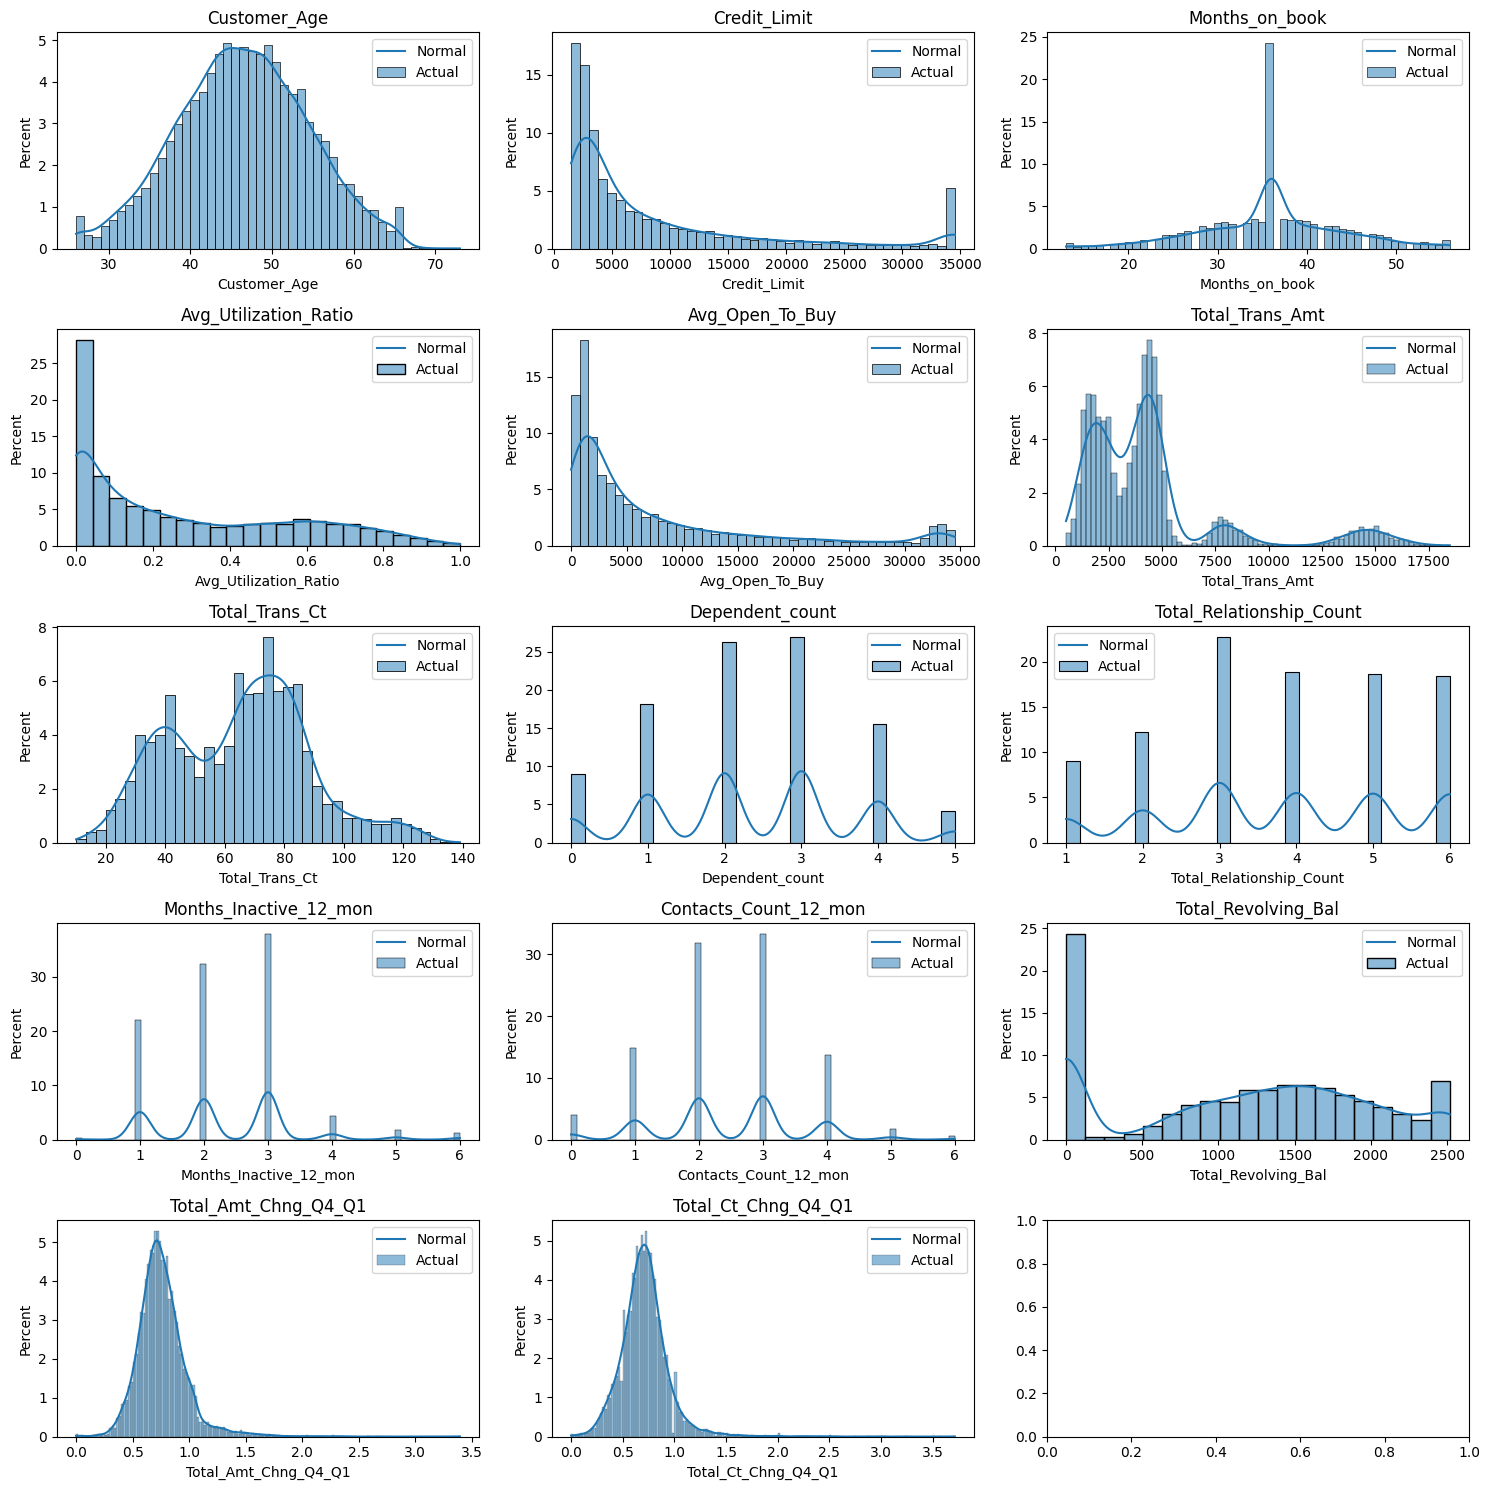

In [34]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt',
                   'Total_Trans_Ct','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
                   'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']
some_columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal','Total_Trans_Amt','Avg_Utilization_Ratio','Months_Inactive_12_mon']

# sns.histplot(a, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns) // 3 + 1, 3, figsize=(15, 15))
    for i, col in enumerate(columns):
        sns.histplot(data_set.loc[:, col], stat="percent", kde=True, ax=ax[i // 3, i % 3])
        ax[i // 3, i % 3].set_title(col)
        ax[i // 3, i % 3].legend(labels=['Normal', 'Actual'])
    plt.tight_layout()

plotDistPlot(numeric_columns)
plt.show()


## Observations : 

- L'âge des clients suit une distribution presque symétrique.
- On observe une densité plus élevée pour les valeurs de limite de crédit entre 0 et 5000, ainsi qu'entre environ 34 000 et 35 000 dollars (asymétrie à gauche).
- Le nombre de mois sur le livre présente une distribution presque symétrique, avec une densité plus élevée autour de 35 à 36 mois.
- Les clients utilisant un faible ratio de crédit, entre 0 et 0.2 par rapport au crédit total, représentent la majorité (asymétrie à gauche).
- La plupart des clients ont un solde de crédit compris entre 0 et 5000 dollars, indiquant qu'ils ont utilisé la majeure partie de leur crédit (asymétrie à gauche).
- Les transactions sont principalement concentrées autour de 1000 à 5100 dollars en montant total, avec un nombre de transactions compris entre 40 et 90 (asymétrie à gauche).
- Le nombre de personnes à charge présente une distribution presque symétrique.
- La période d'inactivité des clients est généralement de 1 à 3 mois.
- Le nombre de contacts avec les clients semble également suivre une distribution presque symétrique.
- Environ 24% des clients ont un solde de 0 sur leur carte de crédit.
- La majorité des clients dépensent plus au quatrième trimestre de l'année par rapport au premier trimestre (asymétrie à gauche).
## Conclusion :
Les données montrent des tendances intéressantes concernant le comportement financier des clients, telles que les préférences de dépenses et les habitudes d'utilisation de crédit.

### Analyse Bivaraie

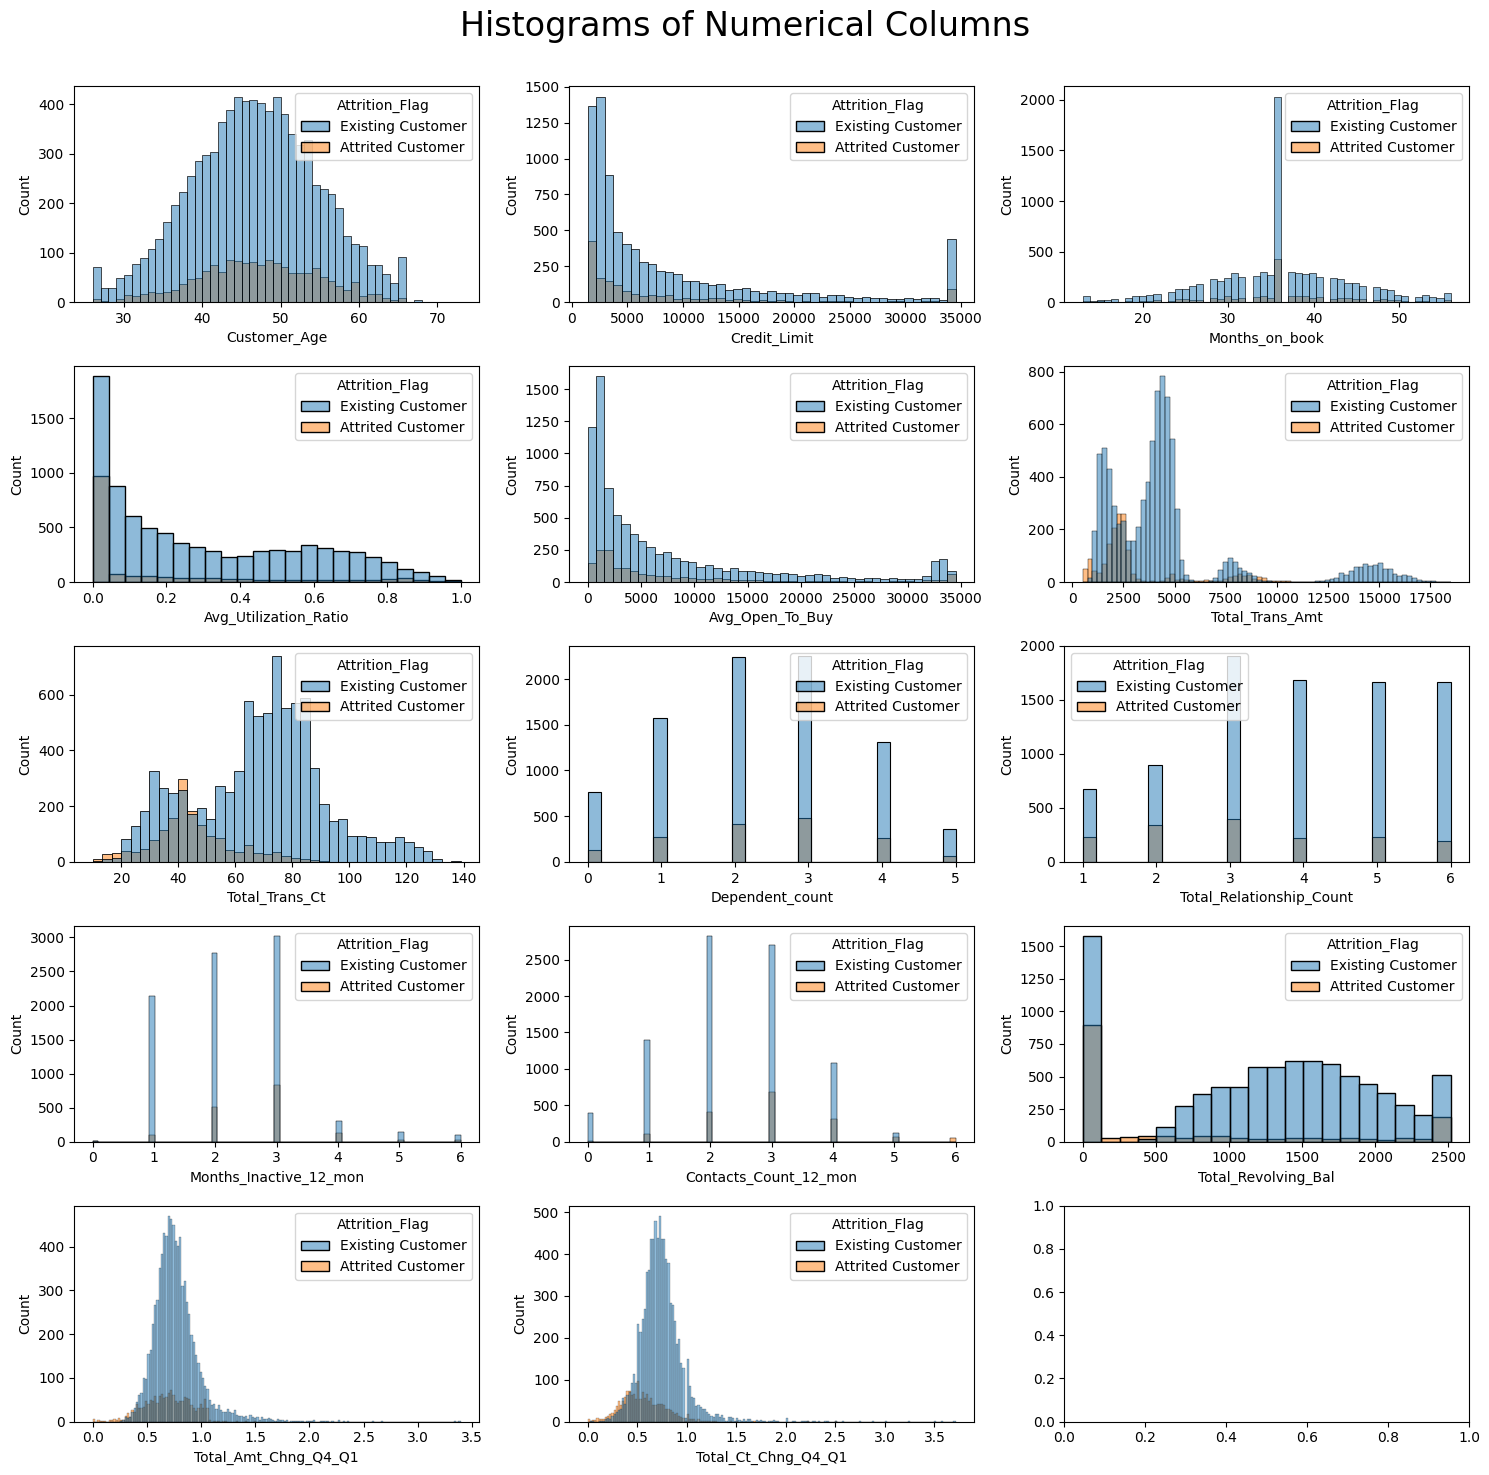

In [35]:
norow = len(numeric_columns) // 3 + 1
fig, ax = plt.subplots(norow, 3, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i, d in enumerate(numeric_columns):
    if i < 3:
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[0, i], hue='Attrition_Flag')
    else:
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[i // 3, i % 3], hue='Attrition_Flag')

plt.tight_layout()
plt.show()

*Remarques :*
- Aucune variation significative dans l'âge des clients car la distribution est presque symétrique.
- Le nombre de personnes à charge pourrait ne pas influencer le taux car la distribution est presque symétrique.
- L'attrition est plus élevée chez les clients avec une limite de crédit inférieure à 10 000.
- Les clients sans solde renouvelable ou avec un solde de 2 500 ont un attrition élevé.
- Aucune attrition chez les clients dont le total des transactions dépasse 12 500.
- L'attrition est importante lorsque le ratio d'utilisation est nul.
- Les clients inactifs depuis deux ou trois mois ont un attrition élevé.

*Conclusion :*
- **l'âge du client** et **le nombre de dépendances** n'ont pas d'influence sur le taux d'attrition car la distribution est presque symétrique et il n'y a donc pas d'indicateur important.

In [41]:
# records of clients that may be quitting  
att_cust = data_set[data_set['Attrition_Flag']=='Attrited Customer']
# get the numerical data of churn clients
att_cust = att_cust[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
# records with clients that are sub
ext_cust = data_set[data_set['Attrition_Flag'] != 'Attrited Customer']
# get the numerical data of sub clients
ext_cust = ext_cust[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio','Dependent_count']]
a = att_cust.describe()
a = a.loc['mean']
b = ext_cust.describe()
b = b.loc['mean']
frame = { 'Lost Customers': a, 'Existing Customers': b } 
result = pd.DataFrame(frame) 
pd.options.display.float_format = '{:,.2f}'.format
result

,Lost Customers,Existing Customers
Customer_Age,46.66,46.26
Months_on_book,36.18,35.88
Total_Relationship_Count,3.28,3.91
Months_Inactive_12_mon,2.69,2.27
Contacts_Count_12_mon,2.97,2.36
Credit_Limit,"8,136.04","8,726.88"
Avg_Open_To_Buy,"7,463.22","7,470.27"
Total_Revolving_Bal,672.82,"1,256.60"
Total_Trans_Amt,"3,095.03","4,654.66"
Avg_Utilization_Ratio,0.16,0.30


*Remarques :*
- En moyenne, les clients se désabonnent après environ 35 à 36 mois d'abonnement, suggérant qu'ils pourraient partir à l'expiration de leur contrat sans le renouveler.
- Les clients ayant quitté le service restent également inactifs pendant environ 4 à 5 mois en moyenne.
- Il est notable que certains clients existants peuvent également partir après avoir atteint une période d'inactivité moyenne.
- Les clients ayant quitté le service présentent des caractéristiques similaires en termes de limites de crédit et d'éléments liés au compte, tels que l'ouverture à l'achat.
- En moyenne, les clients ayant quitté le service ont plus de contacts que les clients existants, mais cela ne semble pas influencer leur décision de partir.
- Les clients ayant quitté le service utilisent environ la moitié de leur limite de crédit, soit environ 15% à 16%, par rapport aux clients existants, qui utilisent environ 30% de leur limite.
- De plus, les clients ayant quitté le service effectuent moins de transactions et ont un solde renouvelable plus faible.

*Conclusion :*
- Comme le client part même après avoir été **contacté**, cela signifie que ce **n'est pas la bonne raison pour laquelle il est parti**.

In [44]:
sub_data = data_set.loc[data_set['Attrition_Flag'] == 'Attrited Customer']
sub_data['Income_Category'].value_counts()

Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: count, dtype: int64

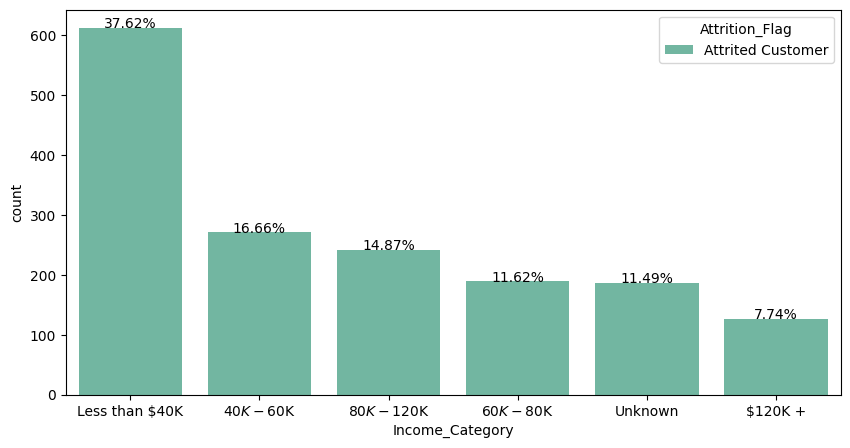

In [69]:
# Define the order in which you want the categories to appear
order = sub_data['Income_Category'].value_counts().index
# Create figure and axis separately
fig, ax = plt.subplots(figsize=(10, 5))
# Use the axis with sns.countplot and specify the order
sns.countplot(x="Income_Category", hue='Attrition_Flag', data=sub_data, palette='Set2', order=order, ax=ax)
# Calculate the percentage of each category
total_count = sub_data['Income_Category'].count()
value_counts = sub_data['Income_Category'].value_counts()
percentages = [(count / total_count) * 100 for count in value_counts]

# Annotate the percentages on the plot
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if i < len(percentages):
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentages[i]:.2f}%', ha="center")

# Show the plot
plt.show()


*Remarque :*
- nous constatons que les clients les plus nombreux (*37%*) gagnent moins de 40k-.
- les clients qui changent le moins gagnent plus de 120k+
- et nous constatons que les clients dont les revenus sont compris entre [80-120]k changent plus souvent que les clients dont les revenus sont compris entre [60-80]k

In [66]:
c = sub_data['Income_Category'].count()
comparison_credit = {}
for ic in set(sub_data['Income_Category']): 
    filtered_data = sub_data[(sub_data['Income_Category'] == ic)]
    rounded_percentage = np.round(((filtered_data['Income_Category'].value_counts().values / c) * 100), 0).tolist()
    comparison_credit[ic] = {
        'Per %': rounded_percentage,         
        'Min value': filtered_data['Credit_Limit'].min(),
        'Max value': filtered_data['Credit_Limit'].max(),
        'Mean value': filtered_data['Credit_Limit'].mean(),
        'Mid value': filtered_data['Credit_Limit'].median()
    }

comparison_df_credit = pd.DataFrame(comparison_credit)
pd.options.display.float_format = '{:,.2f}'.format
comparison_df_credit

,Unknown,$60K - $80K,$40K - $60K,$120K +,Less than $40K,$80K - $120K
Per %,[11.0],[12.0],[17.0],[8.0],[38.0],[15.0]
Min value,"1,438.30","1,438.30","1,438.30","1,656.00","1,438.30","1,438.30"
Max value,"34,516.00","34,516.00","23,981.00","34,516.00","15,987.00","34,516.00"
Mean value,"8,372.90","10,491.97","5,049.80","19,734.38","3,483.31","15,296.73"
Mid value,"5,342.00","7,821.00","3,616.00","16,495.50","2,438.50","11,611.50"


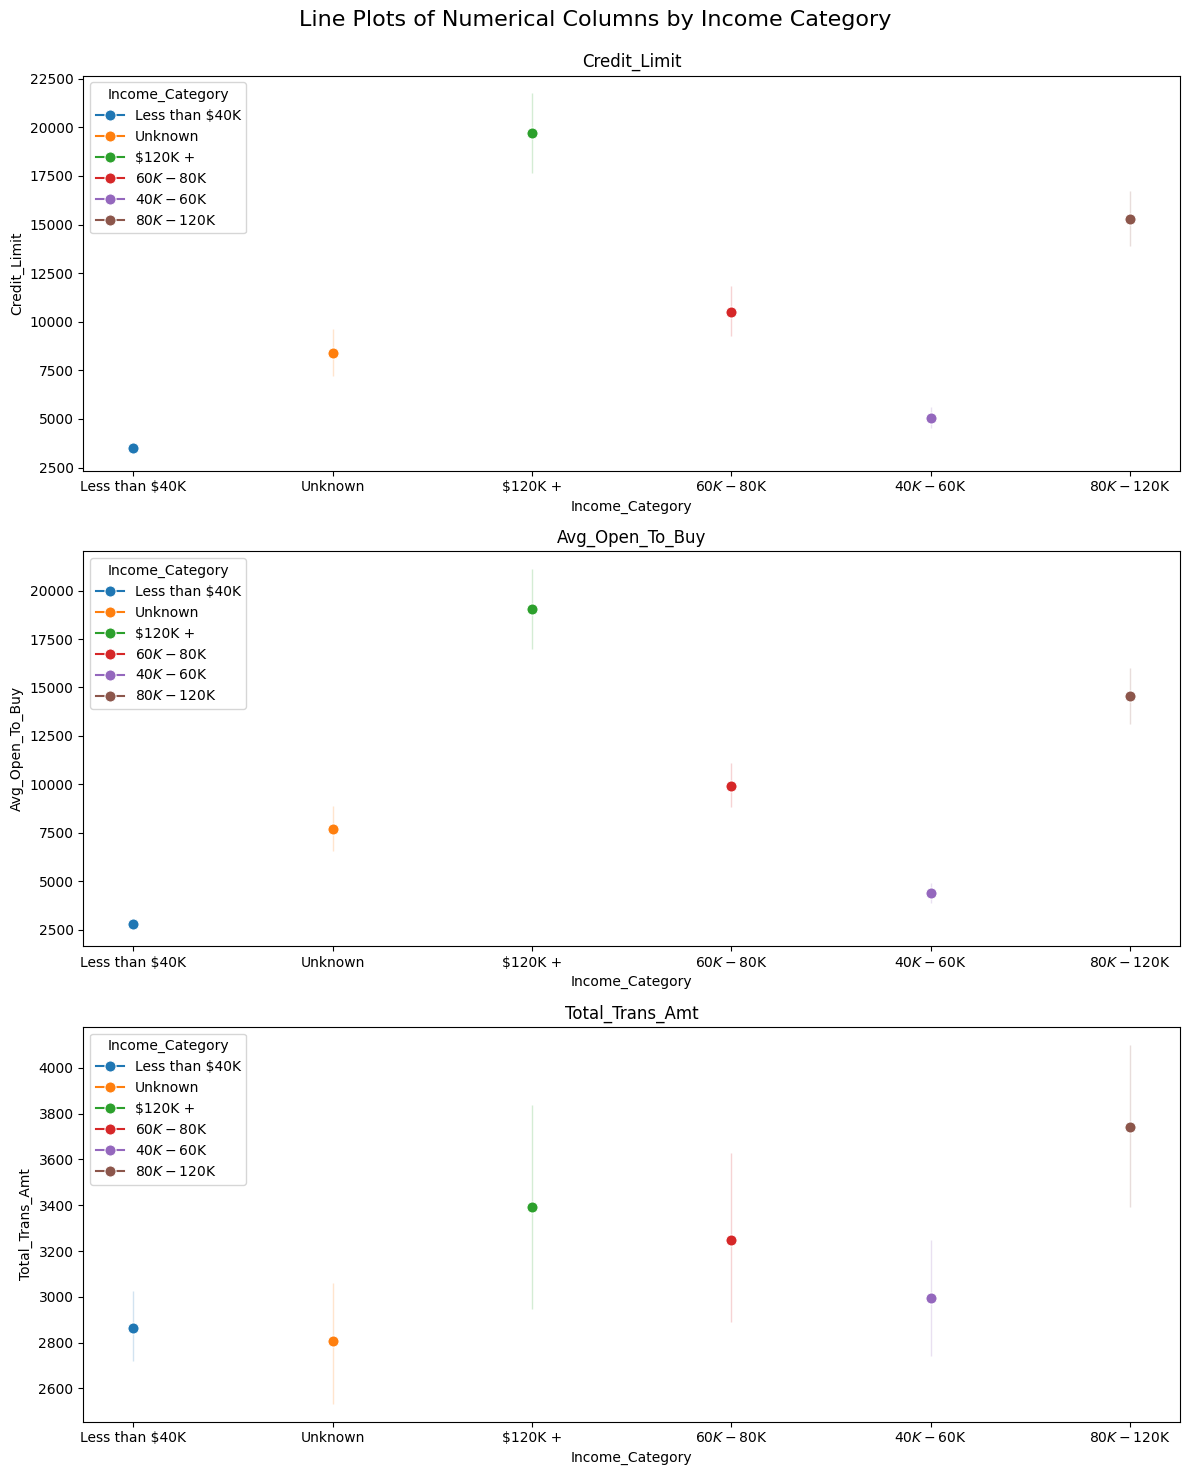

In [45]:
cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Set the title for the entire figure
plt.suptitle('Line Plots of Numerical Columns by Income Category\n', horizontalalignment="center", fontstyle="normal", fontsize=16, fontfamily="sans-serif")

# Iterate over each numeric column
for i, col in enumerate(cols):
    # Create a line plot for each numeric column
    sns.lineplot(x='Income_Category', y=col, data=sub_data, ax=ax[i], hue='Income_Category', marker='o', markersize=8)

    # Set the title for each subplot
    ax[i].set_title(col)

    # Set the labels for x-axis and y-axis
    ax[i].set_xlabel('Income_Category')
    ax[i].set_ylabel(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()